
#**Importing Main Librairies**


In [2]:
pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import splitfolders
from prettytable import PrettyTable
from google.colab.patches import cv2_imshow

# **Define Paths to get Data**

In [ ]:
# les chemins de chaque repertoires
main_dir_url = "/content/drive/MyDrive/chest_xray/"
normal_dir_train = main_dir_url +"train/NORMAL/"
normal_dir_test = main_dir_url +"test/NORMAL/"
pneumonia_dir_train = main_dir_url +"train/PNEUMONIA/"
pneumonia_dir_test = main_dir_url +"test/PNEUMONIA/"
#dictionnaire de repertoires
directorys_dict = {
    0 : normal_dir_train,
    1 : normal_dir_test,
    2 : pneumonia_dir_train,
    3 : pneumonia_dir_test,
}
# les listes de directory (contenu)
listdir_normal_train = os.listdir(directorys_dict[0])
listdir_normal_test = os.listdir(directorys_dict[1])
listdir_pneumonia_train = os.listdir(directorys_dict[2])
listdir_pneumonia_test = os.listdir(directorys_dict[3])
# liste englobante
liste_listdir=[listdir_normal_train,listdir_normal_test,listdir_pneumonia_train,listdir_pneumonia_test]

# **Plot Samples (labeled)**

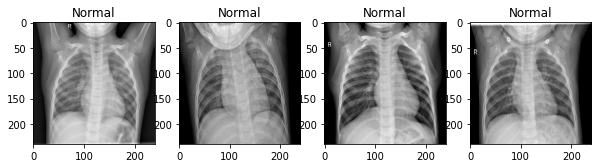

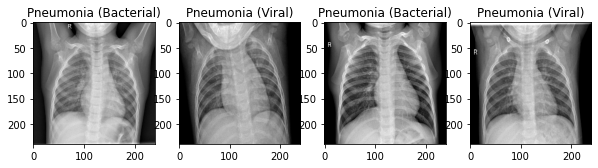

In [ ]:
# plot some X ray images from the dataset (train)
normal_1 = cv2.resize(cv2.imread(directorys_dict[0]+"IM-0115-0001.jpeg"),(240,240))
normal_2 = cv2.resize(cv2.imread(directorys_dict[0]+"IM-0133-0001.jpeg"),(240,240))
normal_3 = cv2.resize(cv2.imread(directorys_dict[0]+"IM-0166-0001.jpeg"),(240,240))
normal_4 = cv2.resize(cv2.imread(directorys_dict[0]+"IM-0367-0001.jpeg"),(240,240))

normal_imgs_to_plot = [normal_1,normal_2,normal_3,normal_4]

bacterial_1 = cv2.resize(cv2.imread(directorys_dict[2]+"person2_bacteria_3.jpeg"),(240,240))
viral_1 = cv2.resize(cv2.imread(directorys_dict[2]+"person88_virus_167.jpeg"),(240,240))
bacterial_2 = cv2.resize(cv2.imread(directorys_dict[2]+"person5_bacteria_15.jpeg"),(240,240))
viral_2 = cv2.resize(cv2.imread(directorys_dict[2]+"person88_virus_163.jpeg"),(240,240))
pneumonia_imgs_to_plot = [bacterial_1,viral_1,bacterial_2,viral_2]

#plot normal lungs
fig = plt.figure(figsize=(10, 10))
columns = 4 
rows = 1
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.title('Normal')
    plt.imshow(normal_imgs_to_plot[i-1])
plt.show()

#plot pneumonia
fig = plt.figure(figsize=(10, 10))
columns = 4 
rows = 1
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    if i%2 ==0:
      plt.title('Pneumonia (Viral)')
    else:
      plt.title('Pneumonia (Bacterial)')
    plt.imshow(normal_imgs_to_plot[i-1])
plt.show()

# **Statestics of the chest X-ray dataset**

In [ ]:
# stats test general
num_test_normal = len(listdir_normal_test)
num_test_pneumonia = len(listdir_pneumonia_test)
TOT_test = num_test_pneumonia + num_test_normal

# stats train general
num_train_normal = len(listdir_normal_train)
num_train_pneumonia = len(listdir_pneumonia_train)
TOT_train = num_train_pneumonia + num_train_normal

#stats test train pneumonia viral/bacterial
bac_str ="bacteria"
cpt_bac_test = 0
cpt_bac_train = 0
cpt_vir_test = 0
cpt_vir_train = 0
for i in range(2,len(directorys_dict)):
  for image_name in liste_listdir[i] :
    #when i equals 2 -> train (pneumonia)
    if i == 2 :
      if bac_str in image_name :
        cpt_bac_train += 1
      else :
        cpt_vir_train += 1
    else :
      if bac_str in image_name :
        cpt_bac_test += 1
      else :
        cpt_vir_test += 1
    
#table General
print('General')
t = PrettyTable(['Class','Train', 'Test'])
t.add_row(['Normal',num_train_normal,num_test_normal])
t.add_row(['Pneumonia',num_train_pneumonia,num_test_pneumonia])
t.add_row(['Total',TOT_train,TOT_test])
print(t)
#table Pneumonia
print('\nPneumonia')
t = PrettyTable(['Class','Train', 'Test'])
t.add_row(['Pneumonia viral',cpt_vir_train,cpt_vir_test])
t.add_row(['Pneumonia bacterial',cpt_bac_train,cpt_bac_test])
t.add_row(['Total',num_train_pneumonia,num_test_pneumonia])
print(t)

General
+-----------+-------+------+
|   Class   | Train | Test |
+-----------+-------+------+
|   Normal  |  1349 | 234  |
| Pneumonia |  3883 | 390  |
|   Total   |  5232 | 624  |
+-----------+-------+------+

Pneumonia
+---------------------+-------+------+
|        Class        | Train | Test |
+---------------------+-------+------+
|   Pneumonia viral   |  1345 | 148  |
| Pneumonia bacterial |  2538 | 242  |
|        Total        |  3883 | 390  |
+---------------------+-------+------+


# **Split Data into Train & Test**

In [ ]:
#import shutil
#bac_str ="bacteria"
#vir_str ="virus"
#cpt = 0
#cpt1 = 0
#for i in range(len(directorys_dict)):
#  for image_name in liste_listdir[i] :  
#      if bac_str in image_name or  vir_str in image_name : # pneumonia 
#        shutil.copy(directorys_dict[i]+image_name,'/content/drive/MyDrive/test/Pneumonia/'+image_name) 
#      else  :                   
#        shutil.copy(directorys_dict[i]+image_name,'/content/drive/MyDrive/test/Normal/'+image_name)   

#print(len(os.listdir('/content/drive/MyDrive/test/Pneumonia/')))
#print(len(os.listdir('/content/drive/MyDrive/test/Normal/')))

In [ ]:
#split data into train 70% validation 15% test 15%
#splitfolders.ratio('/content/drive/MyDrive/test/', output="/content/drive/MyDrive/split/", seed=1337, ratio=(0.7, 0.15,0.15)) 

In [ ]:
# function to calculate viral/bac in a path
def stat_viral_bac(path):
  #stats train pneumonia viral/bacterial
  bac_str ="bacteria"
  cpt_bac = 0
  cpt_vir = 0
  for image_name in os.listdir(path) :
        if bac_str in image_name :
          cpt_bac += 1
        else :
          cpt_vir += 1
  return cpt_bac,cpt_vir 

In [ ]:
# statestics after spliting the dataset
print(len(os.listdir('/content/drive/MyDrive/chest_xray (splited .7 .15 .15)/test/Pneumonia')))
# stats train
num_train_normal = len(os.listdir('/content/drive/MyDrive/chest_xray (splited .7 .15 .15)/train/Normal'))
num_train_pneumonia = len(os.listdir('/content/drive/MyDrive/chest_xray (splited .7 .15 .15)/train/Pneumonia'))
TOT_train = num_train_normal + num_train_pneumonia
# stats test
num_test_normal = len(os.listdir('/content/drive/MyDrive/chest_xray (splited .7 .15 .15)/test/Normal'))
num_test_pneumonia = len(os.listdir('/content/drive/MyDrive/chest_xray (splited .7 .15 .15)/test/Pneumonia'))
TOT_test = num_test_pneumonia + num_test_normal
# stats valdidation
num_valid_normal = len(os.listdir('/content/drive/MyDrive/chest_xray (splited .7 .15 .15)/val/Normal'))
num_valid_pneumonia = len(os.listdir('/content/drive/MyDrive/chest_xray (splited .7 .15 .15)/val/Pneumonia'))
TOT_valid = num_valid_normal + num_valid_pneumonia

# stats train viral/bac
num_train_bac,num_train_vir = stat_viral_bac('/content/drive/MyDrive/chest_xray (splited .7 .15 .15)/train/Pneumonia')
# stats test viral/bac
num_test_bac,num_test_vir = stat_viral_bac('/content/drive/MyDrive/chest_xray (splited .7 .15 .15)/test/Pneumonia')
# stats validation viral/bac
num_val_bac,num_val_vir = stat_viral_bac('/content/drive/MyDrive/chest_xray (splited .7 .15 .15)/val/Pneumonia')

TOT_train_vb = num_train_bac +num_train_vir
TOT_test_vb = num_test_bac + num_test_vir
TOT_valid_vb = num_val_bac + num_val_vir 
#table stat general
t = PrettyTable(['Class','Train','Validation', 'Test'])
t.add_row(['Normal',num_train_normal,num_valid_normal,num_test_normal])
t.add_row(['Pneumonia',num_train_pneumonia,num_valid_pneumonia,num_test_pneumonia])
t.add_row(['Total',TOT_train,TOT_valid,TOT_test])
print(t)

#table Pneumonia
print('\nPneumonia')
t = PrettyTable(['Class','Train','Validation' ,'Test'])
t.add_row(['Pneumonia viral',num_train_vir,num_val_vir,num_test_vir])
t.add_row(['Pneumonia bacterial',num_train_bac,num_val_bac,num_test_bac])
t.add_row(['Total',TOT_train_vb,TOT_valid_vb,TOT_test_vb])
print(t)

642
+-----------+-------+------------+------+
|   Class   | Train | Validation | Test |
+-----------+-------+------------+------+
|   Normal  |  1108 |    237     | 238  |
| Pneumonia |  2991 |    640     | 642  |
|   Total   |  4099 |    877     | 880  |
+-----------+-------+------------+------+

Pneumonia
+---------------------+-------+------------+------+
|        Class        | Train | Validation | Test |
+---------------------+-------+------------+------+
|   Pneumonia viral   |  1056 |    201     | 236  |
| Pneumonia bacterial |  1935 |    439     | 406  |
|        Total        |  2991 |    640     | 642  |
+---------------------+-------+------------+------+


In [19]:
liste = os.listdir('/content/drive/MyDrive/noise chest_xray/Pneumonia')
for i in liste:
  if " (1).jpeg" in i:
    print("in")